# Test script for fastships_open.hull_generator with high-level input

In [1]:
# © 2023, NTNU
# Author: John Martin Kleven Godø <john.martin.godo@ntnu.no>
# This code is licenced under the GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator
from datetime import datetime

import fastships_open.hull_generator.high_level_hull as high_level_hull
from matplotlib.ticker import FormatStrFormatter
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

deg2rad                         = np.pi/180
rad2deg                         = 1/deg2rad

## Input data

In [2]:
# Select input type for high-level hull definition. Types 1 and 2 both take L/B, B/T and Tt/T ratios as input, with type one combining this with LWL and type 2 combining it with volume displacement.
input_type                      = 2

# Output directories
figures_save_dir                = './figures'
meshes_save_dir                 = './meshes'
hull_data_save_dir              = './hull_data'

# Hull properties
l_to_b                          = 16
b_to_t                          = 2.5
Tt_to_T                         = 0.5

if input_type == 1:
    l_wl                            = 40
elif input_type == 2:
    volume_displacement             = 100
else:
    raise ValueError('input_type not recognized')


## Generate hull

In [3]:
if input_type == 1:
    my_hull                          = high_level_hull.HighLevelHull1(l_wl, l_to_b, b_to_t, Tt_to_T)
elif input_type == 2:
    my_hull                          = high_level_hull.HighLevelHull2(volume_displacement, l_to_b, b_to_t, Tt_to_T)
    my_hull.scale_to_displacement()
else:
    raise ValueError('input_type not recognized')

Calculating centers, areas and normal vectors of faces.
Finished calculating centers, areas and normal vectors of faces.
Calculating centers, areas and normal vectors of faces.
Finished calculating centers, areas and normal vectors of faces.
Calculating centers, areas and normal vectors of faces.
Finished calculating centers, areas and normal vectors of faces.


## Export wavefront (.obj) mesh file

In [4]:
now                             = datetime.now()
now_string                      = now.strftime("%Y%m%d")
mesh_name                       = now_string + '_high_level_input_hull' + str(input_type) + '.obj'
mesh_save_path                  = meshes_save_dir + '/' + mesh_name
my_hull.export_obj(mesh_save_path)

## Export waterlines and sections drawings

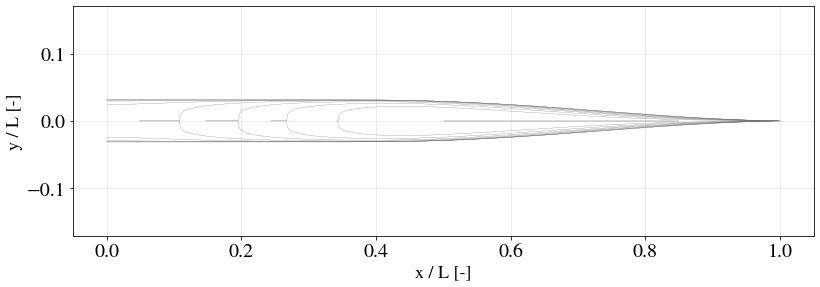

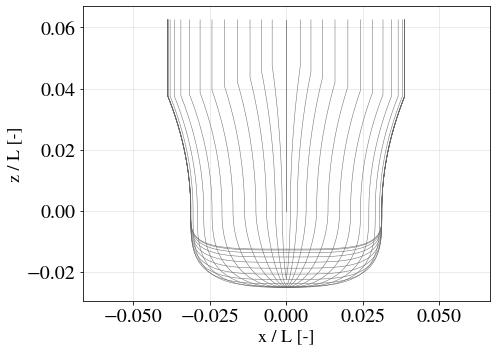

In [5]:
my_hull.export_waterlines(figures_save_dir)
my_hull.export_sections(figures_save_dir)

## Export key hull data

In [6]:
my_hull.export_hull_data(hull_data_save_dir)

Calculating centers, areas and normal vectors of faces.
Finished calculating centers, areas and normal vectors of faces.
Calculating centers, areas and normal vectors of faces.
Finished calculating centers, areas and normal vectors of faces.
Calculating centers, areas and normal vectors of faces.
Finished calculating centers, areas and normal vectors of faces.
